In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

In [6]:
# Load the JSON result files for each entity type
all_arrays = {}
for subject in ["character", "object", "state"]:
    file_path = f"results/{subject}.json"
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Sort keys numerically and create 2D array
    keys_sorted = sorted(data.keys(), key=int, reverse=True)
    array = np.array([
        [data[row][col] for col in sorted(data[row].keys(), key=int)] 
        for row in keys_sorted
    ])
    
    # Rotate array for proper visualization
    all_arrays[subject] = np.rot90(array, k=3)

In [7]:
# Light blue colormap for character data
custom_cmap_char = LinearSegmentedColormap.from_list(
    "character_cmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White (transparent)
        (83/256, 159/256, 167/256),  # Light Blue
    ], 
    N=10  # Number of discrete colors
)

# Light orange/tan colormap for object data
custom_cmap_obj = LinearSegmentedColormap.from_list(
    "object_cmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White (transparent)
        (236/256, 181/256, 118/256),  # Light Orange/Tan
    ], 
    N=10
)

# Light purple colormap for state data
custom_cmap_state = LinearSegmentedColormap.from_list(
    "state_cmap", 
    [
        (1.0, 1.0, 1.0, 0),  # White (transparent)
        (184/256, 126/256, 158/256),  # Light Purple
    ], 
    N=10
)

# Group colormaps with their entity types
heatmaps = [
    ("character", custom_cmap_char),
    ("object", custom_cmap_obj),
    ("state", custom_cmap_state)
]

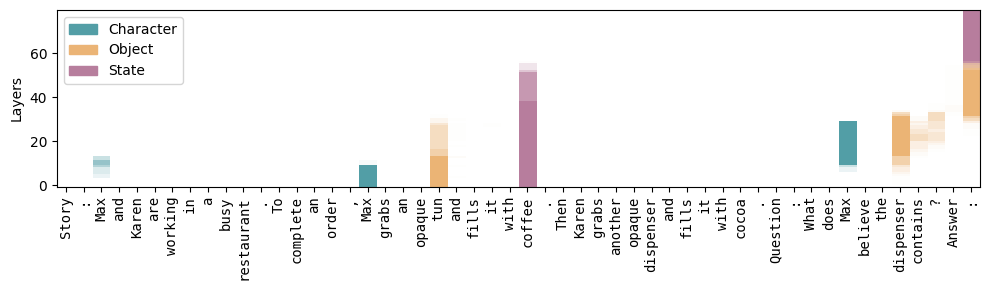

In [10]:
# 3. Example text for x-axis labels
# ================================
# This is an example prompt used in the experiments
x_labels = "Story : Max and Karen are working in a busy restaurant . To complete an order , Max grabs an opaque tun and fills it with coffee . Then Karen grabs another opaque dispenser and fills it with cocoa . Question : What does Max believe the dispenser contains ? Answer :"
x_labels = x_labels.split(" ")

# 4. Create the visualization
# =========================
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Make backgrounds transparent
fig.patch.set_alpha(0)
ax.set_facecolor("none")

# Plot each entity type's heatmap on the same axis
for title, cmap in heatmaps:
    # Get the shape of the current array to ensure we're using the correct dimensions
    current_array = all_arrays[title]
    
    # Plot the heatmap
    im = ax.imshow(
        current_array, 
        cmap=cmap, 
        interpolation="nearest", 
        aspect="auto", 
        origin="lower", 
        alpha=1
    )

# Set the y-axis label
ax.set_ylabel("Layers")

# Set x-axis ticks with words from the example
# Only use as many labels as we have columns in the data
num_x_ticks = min(len(x_labels), all_arrays["character"].shape[1])
ax.set_xticks(range(num_x_ticks))
ax.set_xticklabels(x_labels[:num_x_ticks], rotation=90, fontfamily="monospace")

# Create a legend for the entity types
legend_labels = ["Character", "Object", "State"]
legend_colors = [
    custom_cmap_char(0.9),
    custom_cmap_obj(0.9), 
    custom_cmap_state(0.9)
]
legend_patches = [
    Patch(color=color, label=label) 
    for color, label in zip(legend_colors, legend_labels)
]
ax.legend(handles=legend_patches, loc="upper left")

# Adjust layout to make room for rotated x-tick labels
plt.tight_layout()

# Show the visualization
plt.show()

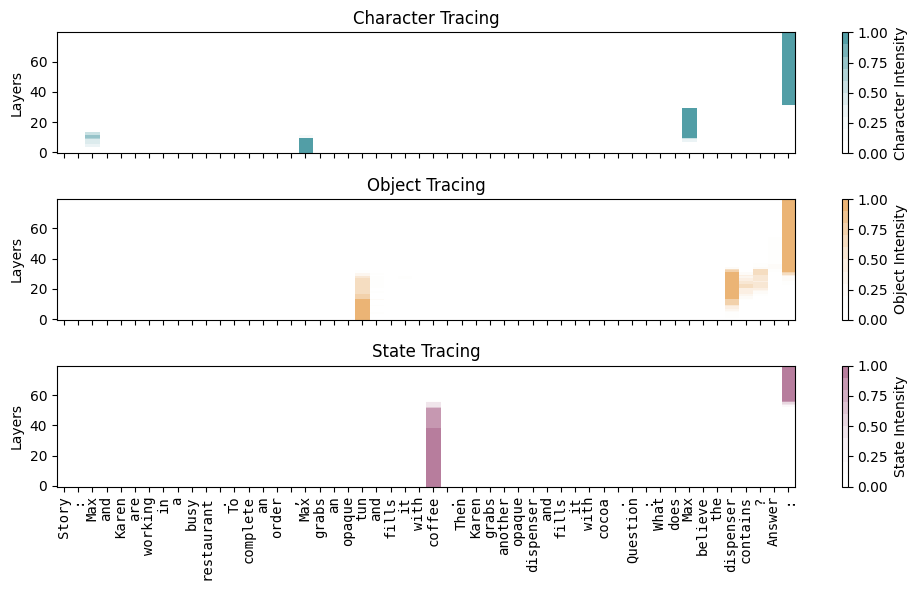

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
fig.patch.set_alpha(0)

for i, (title, cmap) in enumerate(heatmaps):
    # Get current axis and data
    ax = axes[i]
    current_array = all_arrays[title]
    
    # Make axis background transparent
    ax.set_facecolor("none")
    
    # Plot heatmap
    im = ax.imshow(
        current_array, 
        cmap=cmap, 
        interpolation="nearest", 
        aspect="auto", 
        origin="lower"
    )
    
    # Add colorbar
    plt.colorbar(im, ax=ax, label=f"{title.capitalize()} Intensity")
    
    # Set labels
    ax.set_ylabel("Layers")
    ax.set_title(f"{title.capitalize()} Tracing")
    
    # Only set x-ticks for the bottom subplot
    if i == 2:
        num_x_ticks = min(len(x_labels), current_array.shape[1])
        ax.set_xticks(range(num_x_ticks))
        ax.set_xticklabels(x_labels[:num_x_ticks], rotation=90, fontfamily="monospace")

# Adjust layout
plt.tight_layout()

# Show the visualization
plt.show()
